In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data Set

In [ ]:
data = pd.read_csv("/content/Wine_clust .csv")
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
data.shape

(178, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [ ]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

### Preprocessing

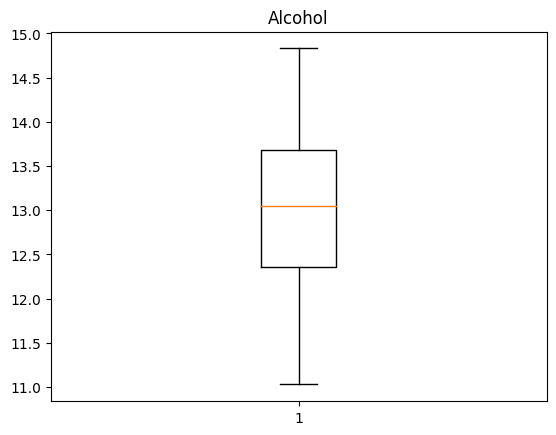

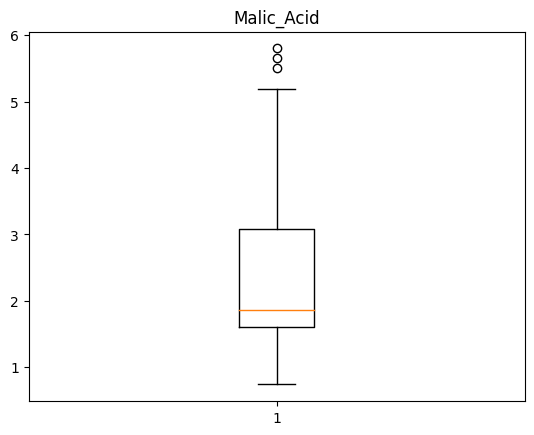

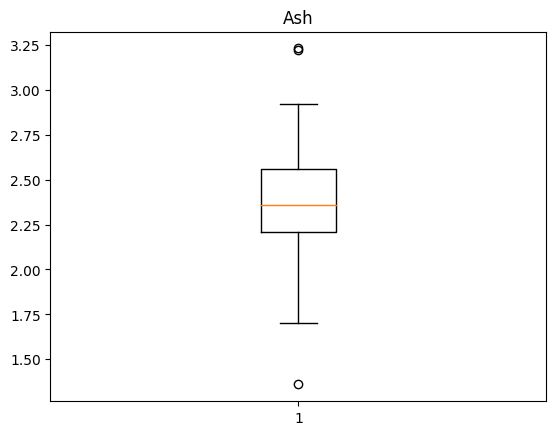

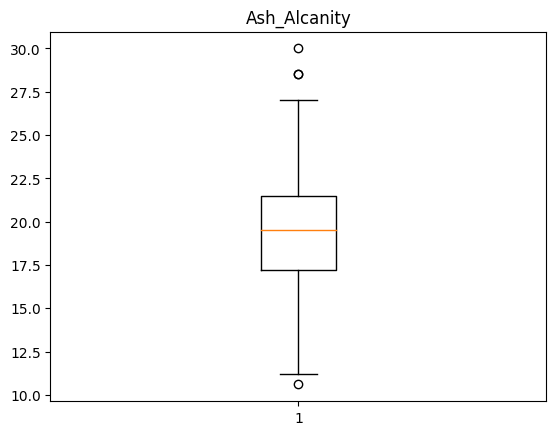

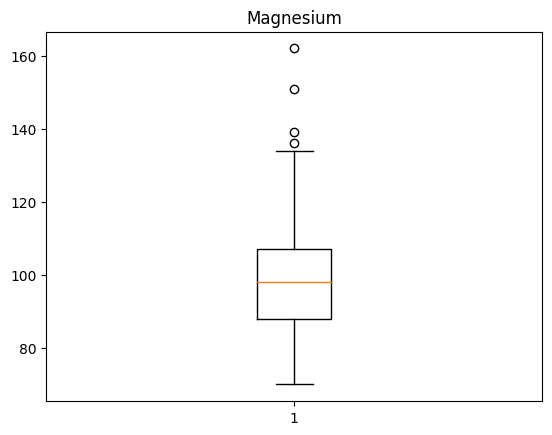

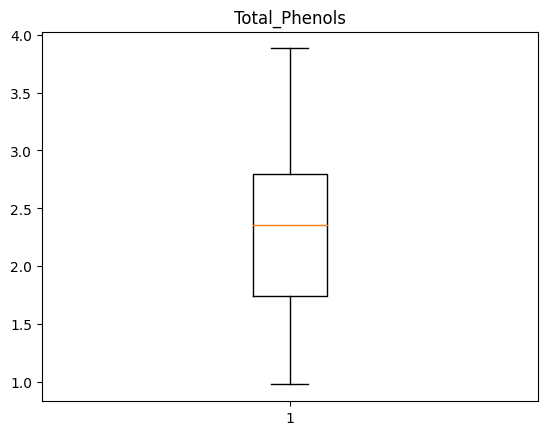

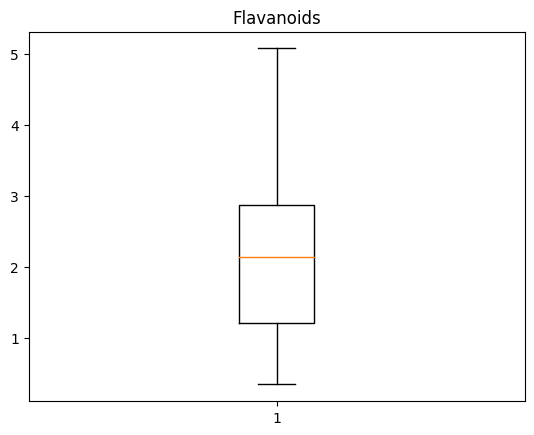

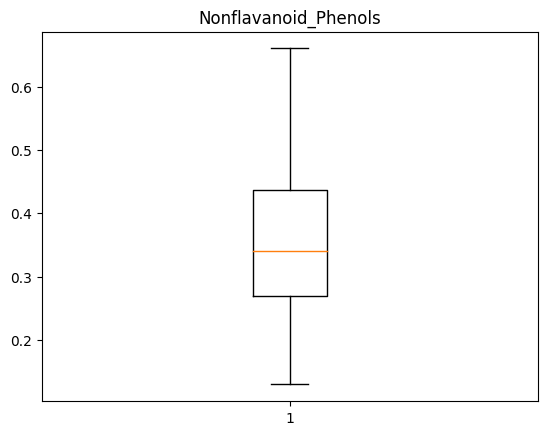

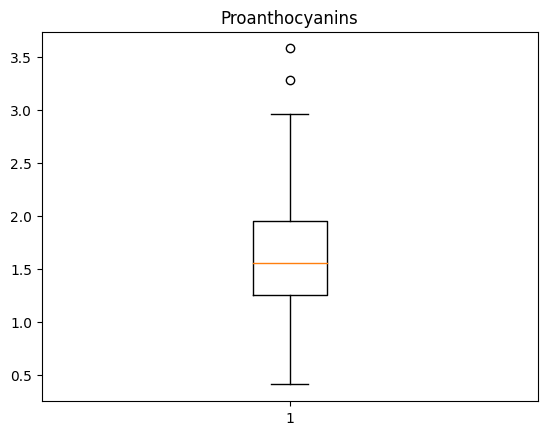

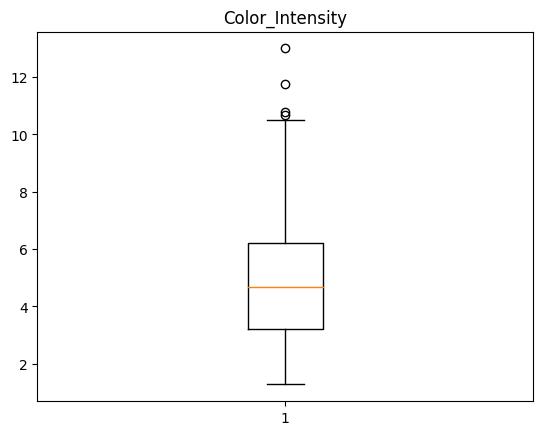

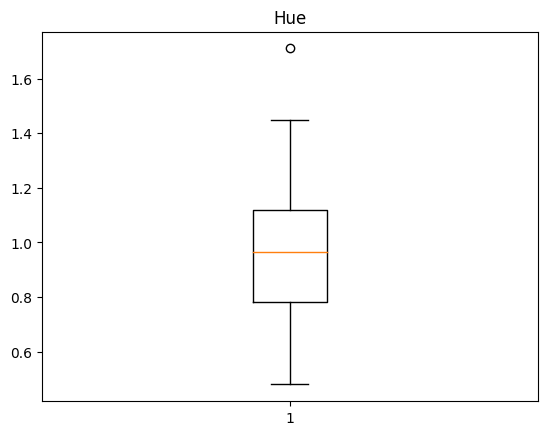

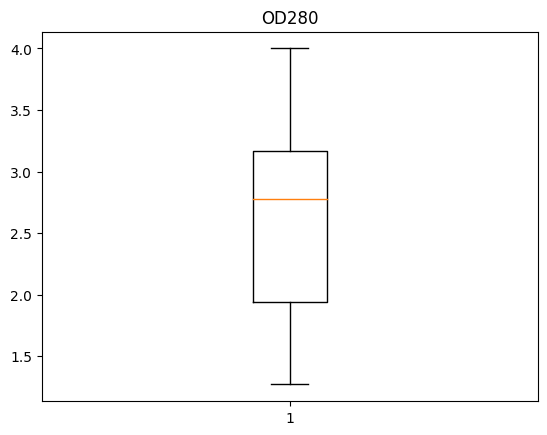

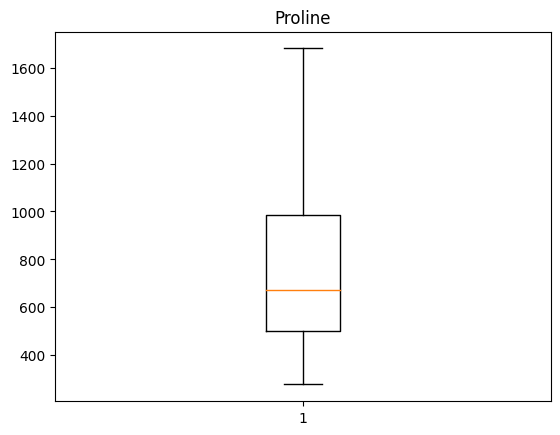

In [ ]:
num_col = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
for i in num_col:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

In [ ]:
Q1 = np.percentile(data["Malic_Acid"],25,method= 'midpoint')
Q2 = np.percentile(data["Malic_Acid"],50,method= 'midpoint')
Q3 = np.percentile(data["Malic_Acid"],75,method= 'midpoint')

In [ ]:
print("q1 is",Q1)
print("q2 is",Q2)
print("q3 is",Q3)

q1 is 1.605
q2 is 1.8650000000000002
q3 is 3.065


In [ ]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("min is",low_lim)
print("max is",up_lim)

min is -0.585
max is 5.255


In [ ]:
outlier = []
for x in data["Malic_Acid"]:
 if((x>up_lim)or(x<low_lim)):
  outlier.append(x)
outlier

[5.8, 5.51, 5.65]

In [ ]:
ind1 = data["Malic_Acid"]>up_lim
data.loc[ind1].index

Int64Index([123, 137, 173], dtype='int64')

In [ ]:
data.drop([123,137,173],inplace= True)

In [ ]:
Q1 = np.percentile(data["Ash"],25,method= 'midpoint')
Q2 = np.percentile(data["Ash"],50,method= 'midpoint')
Q3 = np.percentile(data["Ash"],75,method= 'midpoint')

In [ ]:
print("q1 is",Q1)
print("q2 is",Q2)
print("q3 is",Q3)

q1 is 2.21
q2 is 2.36
q3 is 2.5549999999999997


In [ ]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("min is",low_lim)
print("max is",up_lim)

min is 1.6925000000000003
max is 3.0724999999999993


In [ ]:
outlier = []
for x in data["Ash"]:
 if((x>up_lim)or(x<low_lim)):
  outlier.append(x)
outlier


[3.22, 1.36, 3.23]

In [ ]:
ind1 = data["Ash"]>up_lim
data.loc[ind1].index

Int64Index([25, 121], dtype='int64')

In [ ]:
ind1 = data["Ash"]<low_lim
data.loc[ind1].index

Int64Index([59], dtype='int64')

In [ ]:
data.drop([25,121,59],inplace= True)

In [ ]:
Q1 = np.percentile(data["Ash_Alcanity"],25,method= 'midpoint')
Q2 = np.percentile(data["Ash_Alcanity"],50,method= 'midpoint')
Q3 = np.percentile(data["Ash_Alcanity"],75,method= 'midpoint')

In [ ]:
print("q1 is",Q1)
print("q2 is",Q2)
print("q3 is",Q3)

q1 is 17.15
q2 is 19.25
q3 is 21.5


In [ ]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("min is",low_lim)
print("max is",up_lim)

min is 10.624999999999996
max is 28.025000000000002


In [ ]:
outlier = []
for x in data["Ash_Alcanity"]:
 if((x>up_lim)or(x<low_lim)):
  outlier.append(x)
outlier

[30.0, 28.5]

In [ ]:
ind1 = data["Ash_Alcanity"]>up_lim
data.loc[ind1].index

Int64Index([73, 127], dtype='int64')

In [ ]:
data.drop([73,127],inplace= True)


In [ ]:
Q1 = np.percentile(data["Magnesium"],25,method= 'midpoint')
Q2 = np.percentile(data["Magnesium"],50,method= 'midpoint')
Q3 = np.percentile(data["Magnesium"],75,method= 'midpoint')

In [ ]:
print("q1 is",Q1)
print("q2 is",Q2)
print("q3 is",Q3)

q1 is 88.0
q2 is 98.0
q3 is 107.0


In [ ]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("min is",low_lim)
print("max is",up_lim)

min is 59.5
max is 135.5


In [ ]:
outlier = []
for x in data["Magnesium"]:
 if((x>up_lim)or(x<low_lim)):
  outlier.append(x)
outlier

[151, 136, 162]

In [ ]:
ind1 = data["Magnesium"]>up_lim
data.loc[ind1].index

Int64Index([69, 78, 95], dtype='int64')

In [ ]:
data.drop([69,78,95],inplace=True)

In [ ]:
Q1 = np.percentile(data["Proanthocyanins"],25,method= 'midpoint')
Q2 = np.percentile(data["Proanthocyanins"],50,method= 'midpoint')
Q3 = np.percentile(data["Proanthocyanins"],75,method= 'midpoint')

In [ ]:
print("q1 is",Q1)
print("q2 is",Q2)
print("q3 is",Q3)

q1 is 1.25
q2 is 1.54
q3 is 1.9249999999999998


In [ ]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("min is",low_lim)
print("max is",up_lim)

min is 0.23750000000000027
max is 2.9374999999999996


In [ ]:
outlier = []
for x in data["Proanthocyanins"]:
 if((x>up_lim)or(x<low_lim)):
  outlier.append(x)
outlier

[2.96, 3.58]

In [ ]:
ind1 = data["Proanthocyanins"]>up_lim
data.loc[ind1].index

Int64Index([14, 110], dtype='int64')

In [ ]:
data.drop([14,110],inplace=True)

In [ ]:
Q1 = np.percentile(data["Color_Intensity"],25,method= 'midpoint')
Q2 = np.percentile(data["Color_Intensity"],50,method= 'midpoint')
Q3 = np.percentile(data["Color_Intensity"],75,method= 'midpoint')

In [ ]:
print("q1 is",Q1)
print("q2 is",Q2)
print("q3 is",Q3)

q1 is 3.27
q2 is 4.8
q3 is 6.25


In [ ]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("min is",low_lim)
print("max is",up_lim)

min is -1.1999999999999997
max is 10.719999999999999


In [ ]:
outlier = []
for x in data["Color_Intensity"]:
 if((x>up_lim)or(x<low_lim)):
  outlier.append(x)
outlier

[10.8, 13.0, 11.75]

In [ ]:
ind1 = data["Color_Intensity"]>up_lim
data.loc[ind1].index

Int64Index([151, 158, 159], dtype='int64')

In [ ]:
data.drop([151,158,159],inplace=True)

In [ ]:
Q1 = np.percentile(data["Hue"],25,method= 'midpoint')
Q2 = np.percentile(data["Hue"],50,method= 'midpoint')
Q3 = np.percentile(data["Hue"],75,method= 'midpoint')

In [ ]:
print("q1 is",Q1)
print("q2 is",Q2)
print("q3 is",Q3)

q1 is 0.795
q2 is 0.97
q3 is 1.12


In [ ]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("min is",low_lim)
print("max is",up_lim)

min is 0.30749999999999994
max is 1.6075000000000002


In [ ]:
outlier = []
for x in data["Hue"]:
 if((x>up_lim)or(x<low_lim)):
  outlier.append(x)
outlier

[1.71]

In [ ]:
ind1 = data["Hue"]>up_lim
data.loc[ind1].index

Int64Index([115], dtype='int64')

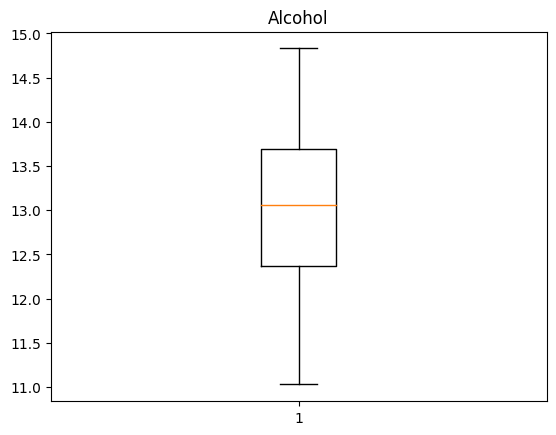

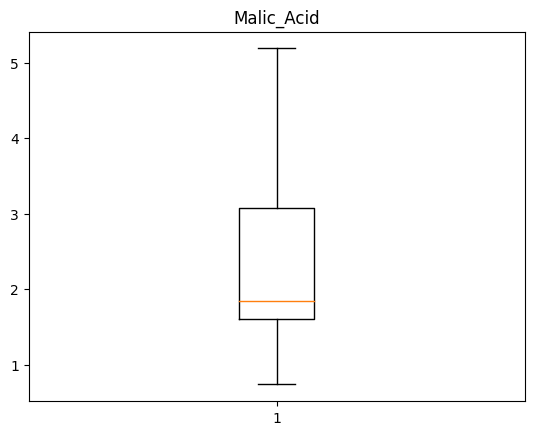

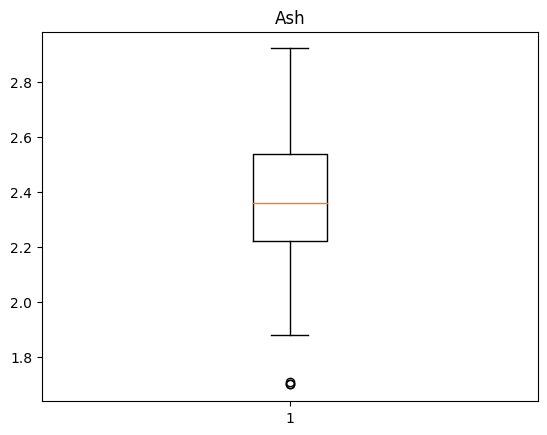

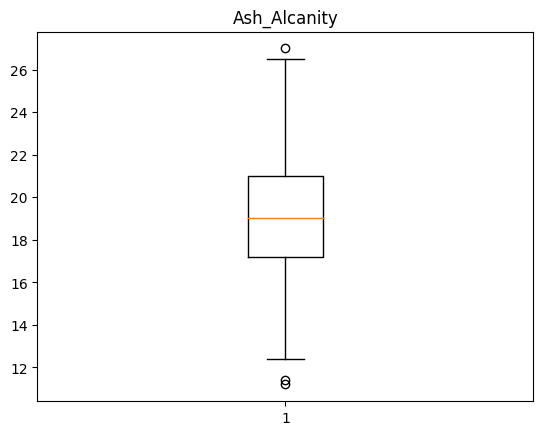

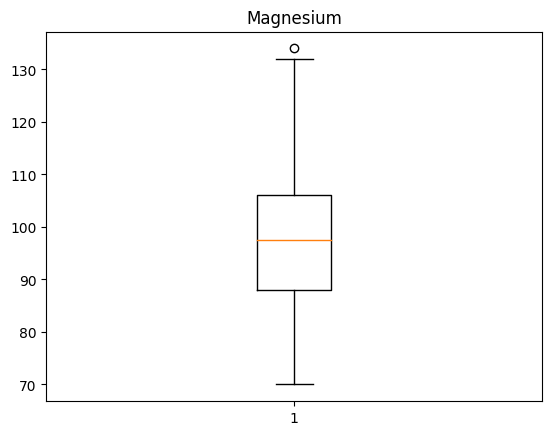

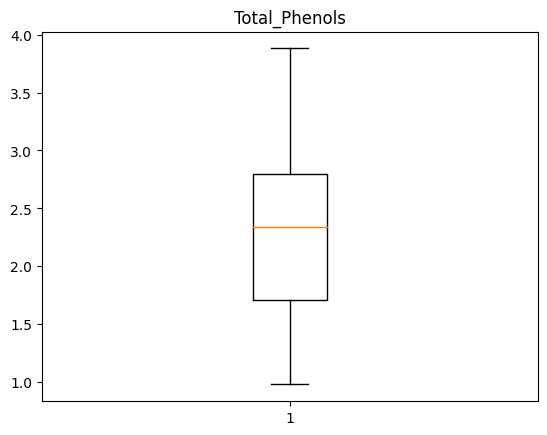

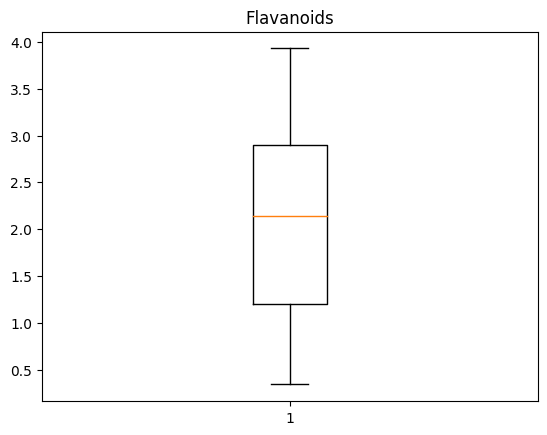

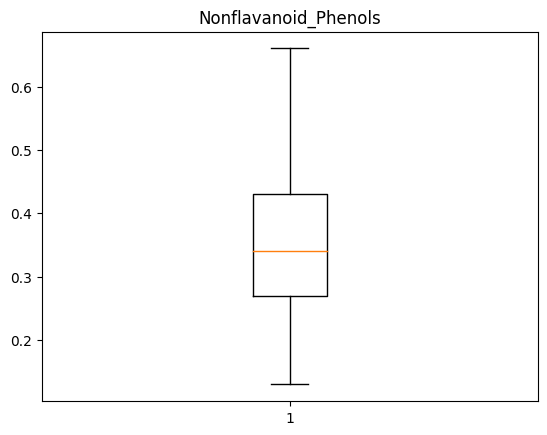

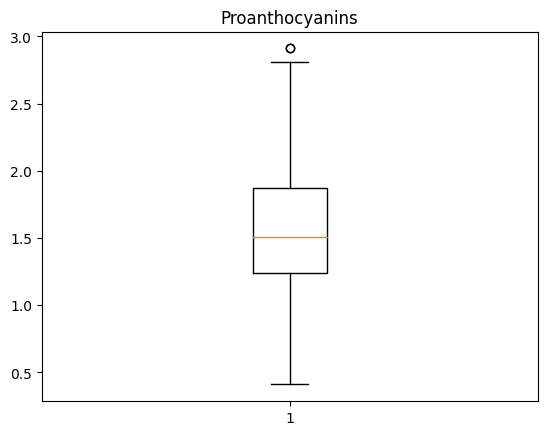

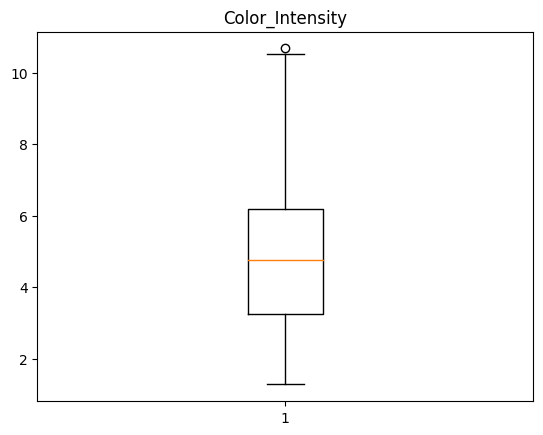

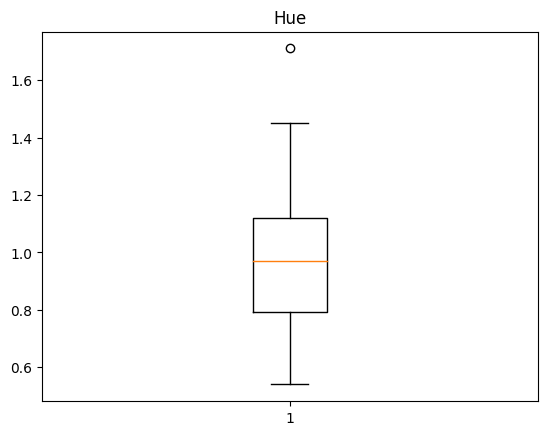

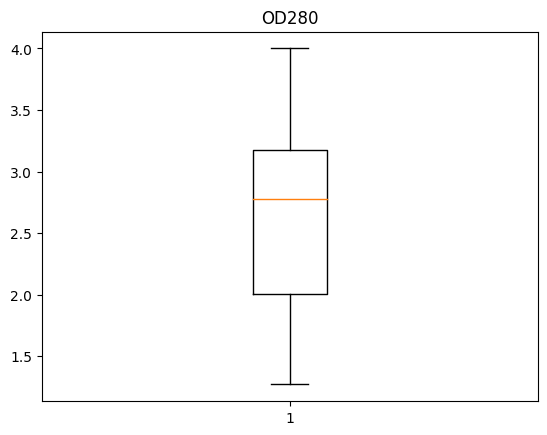

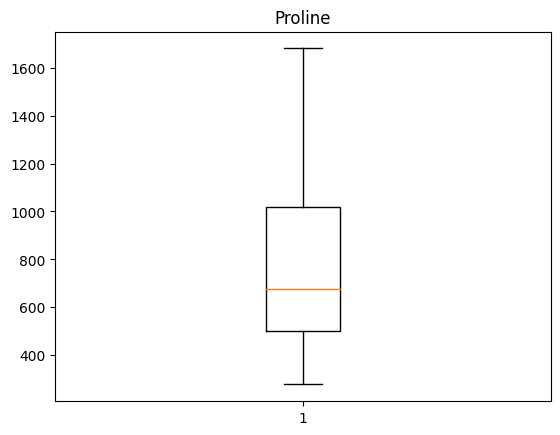

In [ ]:
for i in num_col:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

### KMeans

In [ ]:
X = data[['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium','Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols','Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']]

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
wcss=[]
for i in range(1,11):
    km = KMeans(n_clusters=i,n_init=20)
    km.fit(X)
    css = km.inertia_
    print('Clusters=',i," wcss= ",css)
    wcss.append(css)

Clusters= 1  wcss=  16308300.584856007
Clusters= 2  wcss=  4065127.29013717
Clusters= 3  wcss=  2094157.0792910561
Clusters= 4  wcss=  1198586.8288328757
Clusters= 5  wcss=  802131.0174622089
Clusters= 6  wcss=  571653.3681413265
Clusters= 7  wcss=  362116.5545627461
Clusters= 8  wcss=  290756.99027731305
Clusters= 9  wcss=  241195.86539136525
Clusters= 10  wcss=  192524.21674536564


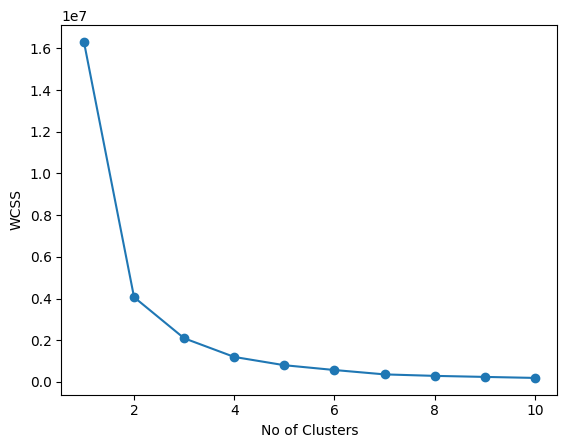

In [ ]:
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
km = KMeans(n_clusters=2,n_init=20)
km.fit(X)

KMeans(n_clusters=2, n_init=20)

In [ ]:
cluster_labels = km.predict(X)
cluster_labels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
from sklearn.metrics import silhouette_score
sil_km =  silhouette_score(X,cluster_labels)
sil_km

0.6605645843098455

### Agglomerative Clustering

In [ ]:
import scipy.cluster.hierarchy as sch

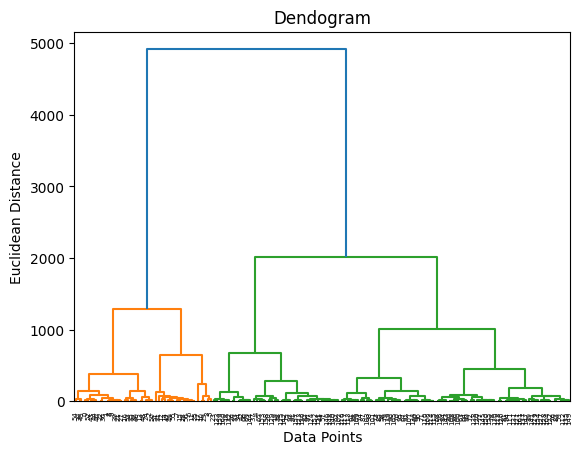

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(data, method = 'ward'))
plt.title('Dendogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
ahc = AgglomerativeClustering(n_clusters =2, affinity =  'euclidean', linkage = 'ward')
y_ahc = ahc.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
y_ahc

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import silhouette_score
sil_ahc =  silhouette_score(data,y_ahc)
sil_ahc

0.6625084150439519

### DB Scan clustering

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors

In [ ]:
neigh = NearestNeighbors()
nbrs = neigh.fit(X)

In [ ]:
distance,indices = nbrs.kneighbors(X)

In [ ]:
distance

array([[  0.        ,  10.3928052 ,  22.34074753,  24.76023223,
         25.09466278],
       [  0.        ,   6.78638343,   7.83291772,  13.14076482,
         16.01121794],
       [  0.        ,  12.2969915 ,  13.16761937,  36.71057341,
         37.15471975],
       [  0.        ,  30.09196903,  31.15941752,  35.80962161,
        105.04076923],
       [  0.        ,  17.72868015,  20.77652521,  22.42155882,
         27.45302169],
       [  0.        ,  30.09196903,  60.48524365,  65.39770944,
         75.09062658],
       [  0.        ,   6.23935093,  10.34467496,  10.72270022,
         13.38382232],
       [  0.        ,  15.3305512 ,  16.63357147,  17.67303596,
         22.97238995],
       [  0.        ,   3.27007645,   6.78638343,  10.3394584 ,
         11.292161  ],
       [  0.        ,   3.27007645,   7.83291772,  10.54944548,
         11.03619047],
       [  0.        ,   5.41997232,  31.15941752,  60.48524365,
        135.37838712],
       [  0.        ,   5.29867908,   9.811

In [ ]:
indices

array([[  0,  52,  43,  46,  44],
       [  1,   8,   9,  46,  21],
       [  2,  50,  24,  48,  13],
       [  3,   5,  10,  29,  51],
       [  4,  65, 153, 158, 142],
       [  5,   3,  10,  29,  51],
       [  6,  25,  11,  28,  56],
       [  7,  15,  56,  14,  28],
       [  8,   9,   1,  27,  21],
       [  9,   8,   1,  27,  21],
       [ 10,  29,   3,   5,  51],
       [ 11,  25,  28,   6,  55],
       [ 12,  14,   6,  25,  28],
       [ 13,  48,  16,   2,  53],
       [ 14,   7,  12,  56,   6],
       [ 15,  56,   7,  28,  55],
       [ 16,  53,  35,  48,  13],
       [ 17,  29,  10,   3,   5],
       [ 18, 160, 132, 159,  23],
       [ 19,  38,  37,  20,  65],
       [ 20, 129, 158, 153,  65],
       [ 21,  27,   9,   8,  39],
       [ 22,  36,  27,  39,  21],
       [ 23, 133, 132,  18, 160],
       [ 24,   2,  50,  48,  13],
       [ 25,  11,   6,  28,  56],
       [ 26,  33,  69,  42,  34],
       [ 27,  21,  39,   8,   9],
       [ 28,  56,  25,  11,   6],
       [ 29,  

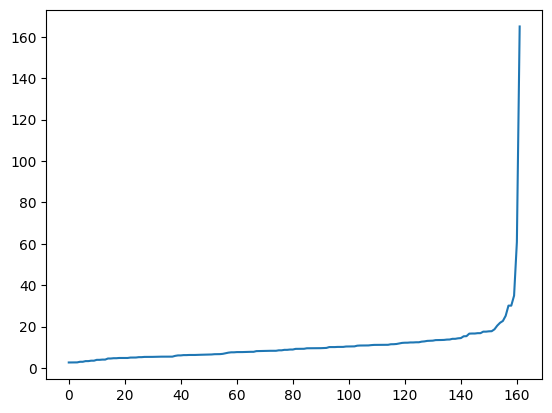

In [ ]:
distances = np.sort(distance,axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
clustering = DBSCAN(eps=35,min_samples=3)
clustering.fit(X)

DBSCAN(eps=35, min_samples=3)

In [ ]:
clusters = clustering.labels_

In [ ]:
len(set(clusters))

7

In [ ]:
silhouette_score(X,clusters)

0.4701161293653681